In [124]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [125]:
# https://www.kaggle.com/code/mobasshir/lazy-predict-101
from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
# put data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+E

# Inpnter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Machine Learning from Titanic Disaster

# First and foremost, we want to understand what data we have:

### PassengerId - Identifier 


### Survived: This is our target variable, indicating whether a passenger survived (1) or didn't survive (0).

### Pclass: This represents the socio-economic class of the passenger, with three categories: 1st class (Upper), 2nd class (Middle), and 3rd class (Lower).

### Name: The passenger's name is included in this column. While names themselves may not directly correlate with survival, you can extract titles (e.g., Mr., Mrs.) which might provide additional information.

### Sex: This column indicates the gender of the passenger, with values "male" and "female."

### Age: Age of the passenger, which is fractional if less than 1 and in the form of xx.5 if estimated.

### SibSp: This column represents the number of siblings or spouses traveling with each passenger. It defines family relations based on siblings and spouses.

### Parch: Indicates the number of parents or children traveling with each passenger. It defines family relations based on parents and children.

### Ticket: This column contains the ticket number of the passenger, which may or may not provide predictive information.

### Fare: The fare paid by each passenger for the ticket.

### Cabin: Cabin number, which might provide information about the passenger's location on the ship. However, it has many missing values.

### Embarked: This column represents the port of embarkation for each passenger and has three possible values: C (Cherbourg), Q (Queenstown), and S (Southampton).


In [134]:
# Let's load our dataset into a DataFrame
data = pd.read_csv('/kaggle/input/titanic/train.csv')

def preprocessing(raw_data):
    # lets explore if there is anything relevent in the Name column that might give us a hint to anything
    raw_data['Title'] = raw_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0])
    raw_data['FamSize'] = raw_data['SibSp'] + raw_data['Parch']

    # One-hot encoding
    pclass_dummies = pd.get_dummies(raw_data['Title'], prefix='Title')

    # Concatenate the one-hot encoded columns to the original DataFrame
    raw_data = pd.concat([raw_data, pclass_dummies], axis=1)

    # binary encode the outputs
    titles = ['Title_ Capt', 'Title_ Col', 'Title_ Don', 'Title_ Dr',
           'Title_ Jonkheer', 'Title_ Lady', 'Title_ Major', 'Title_ Master',
           'Title_ Miss', 'Title_ Mlle', 'Title_ Mme', 'Title_ Mr', 'Title_ Mrs',
           'Title_ Ms', 'Title_ Rev', 'Title_ Sir', 'Title_ the Countess']

    for title in titles:
        raw_data[title] = (raw_data[title] == True).astype(int)


    # One-hot encoding
    pclass_dummies = pd.get_dummies(raw_data['Embarked'], prefix='Embarked')

    # Concatenate the one-hot encoded columns to the original DataFrame
    raw_data = pd.concat([raw_data, pclass_dummies], axis=1)

    # binary encode the outputs
    embarked = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

    for places in embarked:
        raw_data[places] = (raw_data[places] == True).astype(int)

    # binary encode "Sex" with Female as 1 as they have higher probabilities of surviving
    raw_data['Sex'] = (raw_data['Sex'] == 'female').astype(int)

    # One-hot encoding
    pclass_dummies = pd.get_dummies(raw_data['Pclass'], prefix='Pclass')

    # Concatenate the one-hot encoded columns to the original DataFrame
    raw_data = pd.concat([raw_data, pclass_dummies], axis=1)
    raw_data['Pclass_1'] = (raw_data['Pclass_1'] == True).astype(int)
    raw_data['Pclass_2'] = (raw_data['Pclass_2'] == True).astype(int)
    raw_data['Pclass_3'] = (raw_data['Pclass_3'] == True).astype(int)


    # lets normalize the Age column so that the numbers are between 0 and 1
    raw_data['Age'] = raw_data['Age'] /raw_data['Age'].abs().max() 

    # lets normalize the SibSp column so that the numbers are between 0 and 1
    raw_data['SibSp'] = raw_data['SibSp'] /raw_data['SibSp'].abs().max() 

    # lets normalize the Parch column so that the numbers are between 0 and 1
    raw_data['Parch'] = raw_data['Parch'] /raw_data['Parch'].abs().max() 

    # lets normalize the Parch column so that the numbers are between 0 and 1
    raw_data['Fare'] = raw_data['Fare'] /raw_data['Fare'].abs().max() 
    
    return raw_data


def select_columns(data):
    select_from_data = data.copy()
    columns_to_keep = ['Survived', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamSize',
       'Title_ Capt', 'Title_ Col', 'Title_ Don', 'Title_ Dr',
       'Title_ Jonkheer', 'Title_ Lady', 'Title_ Major', 'Title_ Master',
       'Title_ Miss', 'Title_ Mlle', 'Title_ Mme', 'Title_ Mr', 'Title_ Mrs',
       'Title_ Ms', 'Title_ Rev', 'Title_ Sir', 'Title_ the Countess',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3']
    



preprocessed_data = preprocessing(data)
preprocessed_data.columns






Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamSize',
       'Title_ Capt', 'Title_ Col', 'Title_ Don', 'Title_ Dr',
       'Title_ Jonkheer', 'Title_ Lady', 'Title_ Major', 'Title_ Master',
       'Title_ Miss', 'Title_ Mlle', 'Title_ Mme', 'Title_ Mr', 'Title_ Mrs',
       'Title_ Ms', 'Title_ Rev', 'Title_ Sir', 'Title_ the Countess',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [135]:
preprocessed_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",0,0.28,0.12,0.00,A/5 21171,0.01,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.47,0.12,0.00,PC 17599,0.14,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0.33,0.00,0.00,STON/O2. 3101282,0.02,...,0,0,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.44,0.12,0.00,113803,0.10,...,0,0,0,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0.44,0.00,0.00,373450,0.02,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0.34,0.00,0.00,211536,0.03,...,0,1,0,0,0,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,0.24,0.00,0.00,112053,0.06,...,0,0,0,0,0,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,0.12,0.33,W./C. 6607,0.05,...,0,0,0,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,0.33,0.00,0.00,111369,0.06,...,0,0,0,0,1,0,0,1,0,0


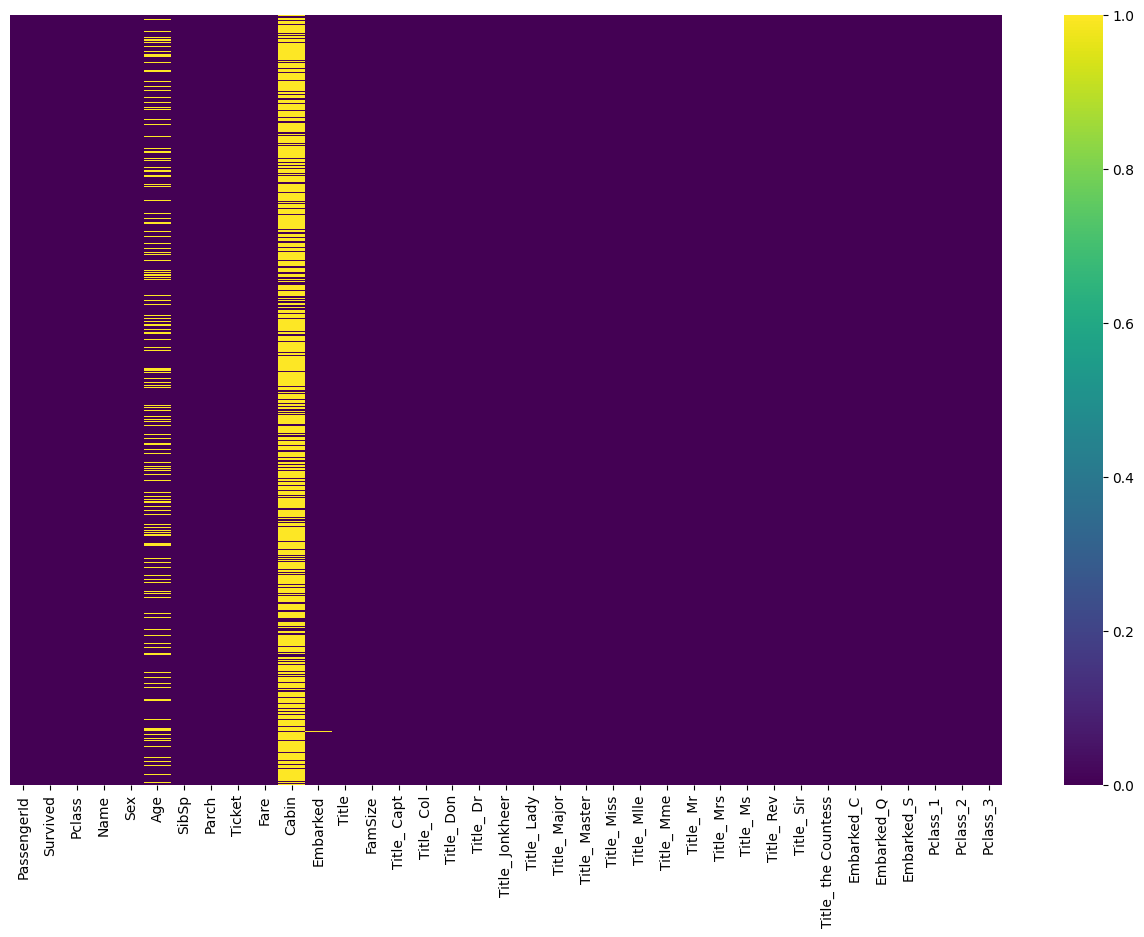

In [127]:
def visualize_missing_data(data):
    plt.figure(figsize=(16,10))
    sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')
    plt.show()

visualize_missing_data(preprocessed_data)

In [128]:
#sns.pairplot(raw_data, hue="Survived")

In [129]:
plt.figure(figsize=(20,15))
sns.heatmap(preprocessed_data.corr(),annot=True)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 2000x1500 with 0 Axes>